*0: Taylor Expansion*


Taylorscope: Local Approximations & Radius-of-Trust
Objective: Approximate functions near a point using truncated Taylor series and quantify truncation
error.

Core Concept: Taylor/Maclaurin series and truncation error estimation.

Task: 
-Write a function `taylor_approx(f, a, n)` that builds the n-term Taylor polynomial of `f` about
`a`. 
-Plot true vs. approximation and error vs. distance for test functions like sin, cos, exp. 
-Search for the radius-of-trust where error stays below a threshold.

Learning Outcome: Construct Taylor polynomials and diagnose accuracy.

In [6]:
import numpy as np
import matplotlib.pyplot as plt


In [7]:
#================ define a simple derivative method =========================
def derivative(f, x, n):
        """Compute the n-th derivative of f at point x using finite differences."""
        h = 1e-5
        if n == 0:
            return f(x)
        elif n == 1:
            return (f(x + h) - f(x - h)) / (2 * h)
        else:
            return (derivative(f, x + h, n - 1) - derivative(f, x - h, n - 1)) / (2 * h)

In [8]:
#================= define taylor expansion, with optional number of terms ===============
def taylor_expansion(func, a, num_terms=3):
    """
    Compute the Taylor expansion of a function around point a.

    Parameters:
    func : function
        The function to be expanded.
    a : float
        The point around which to expand the function.
    num_terms : int
        The number of terms in the Taylor expansion.

    Returns:
    taylor_func : function
        A function representing the Taylor expansion.
    """

    coeffs = [derivative(func, a, n) / np.math.factorial(n) for n in range(num_terms)]

    def taylor_func(x):
        return sum(coeffs[n] * (x - a)**n for n in range(num_terms))

    return taylor_func

In [72]:
#================= example usage ==============================
def vs_analytical(f, a=0):
    x = np.linspace(-2+a, 2+a, 4000)
    y = f(x)

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label='Analytical Function', color='blue', linewidth=2)

    # Taylor expansions with different number of terms
    for num_terms in [1, 3, 5, 7]:
        taylor_func = taylor_expansion(f, a, num_terms=num_terms)
        y_taylor = taylor_func(x)
        plt.plot(x, y_taylor, label=f'Taylor Expansion (n={num_terms})', linestyle='--', linewidth=1)
    

    plt.title('Taylor Expansion vs Analytical Function')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.xlim(-2+a, 2+a)
    plt.ylim(-4, 4)
    plt.axhline(0, color='black',linewidth=0.5, ls='--')
    plt.axvline(0, color='black',linewidth=0.5, ls='--')
    plt.legend()
    plt.grid()
    plt.show()

    # Plot absolute error for each number of terms in the Taylor expansion
    plt.figure(figsize=(10, 6))
    for num_terms in [1, 3, 5, 7]:
        taylor_func = taylor_expansion(f, a, num_terms=num_terms)
        y_taylor = taylor_func(x)
        abs_error = np.abs(y - y_taylor)
        plt.plot(x, abs_error, label=f'Absolute Error (n={num_terms})', linestyle='--', linewidth=1)

    plt.title('Absolute Error of Taylor Expansion')
    plt.xlabel('x')
    plt.ylabel('Absolute Error')
    plt.xlim(a, a+0.5)
    plt.ylim(0, 4)
    plt.axhline(0, color='black', linewidth=0.5, ls='--')
    plt.axvline(0, color='black', linewidth=0.5, ls='--')
    plt.legend()
    plt.grid()
    plt.show()

*Taylor expansion about centers a=0 and a=1*

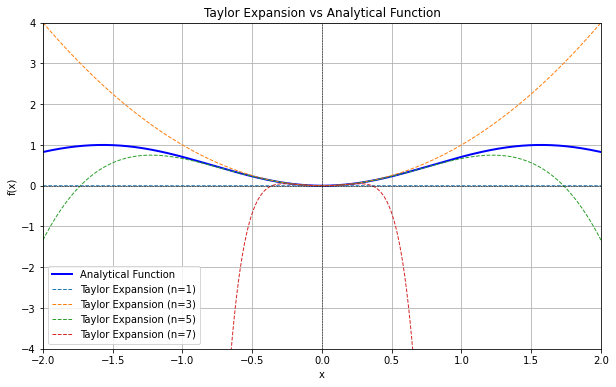

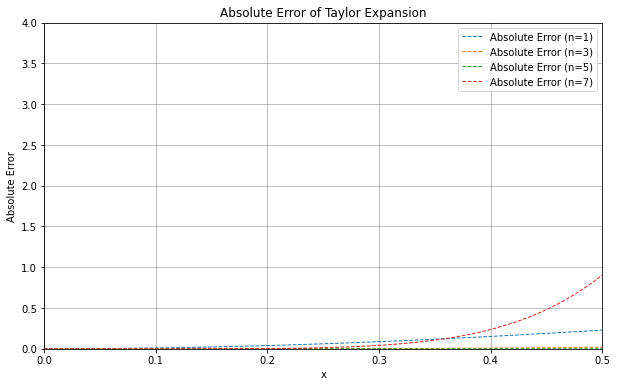

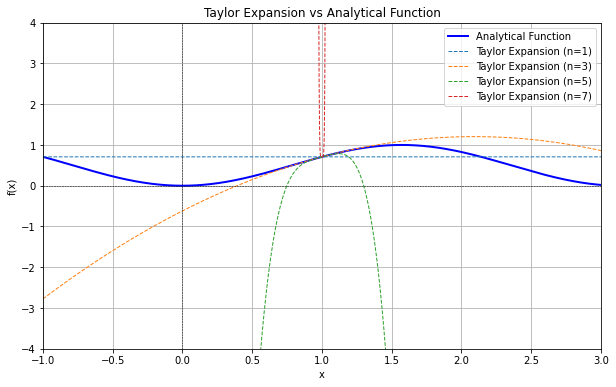

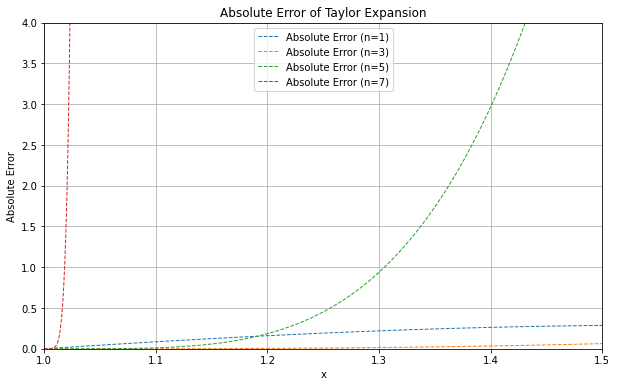

In [74]:
num_centers = 2

for i in range(num_centers):
    vs_analytical(lambda x: np.sin(x)**2, 0+i)